In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
%reload_ext autoreload

In [2]:
from peaky_finder import PeakyFinder

In [3]:
path = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/Postdocs/Xuan Cao/Data/LIBS/MW2-112/raw/'
finder = PeakyFinder(path)

In [4]:
finder.data.load_data()

In [5]:
testwavelength = finder.data.data[10,0]
testdata = finder.data.data[10, 1]

fourier peaks done
fit peaks done
fit shoulders done
x window length: 17
x window length: 14
x window length: 30
x window length: 43
x window length: 47
x window length: 68
x window length: 9
x window length: 18
x window length: 9
x window length: 39
x window length: 14
x window length: 9
x window length: 31
x window length: 20
x window length: 19
x window length: 10
x window length: 15
x window length: 15
x window length: 19
x window length: 19
x window length: 10
x window length: 21
x window length: 13
x window length: 12
x window length: 15
x window length: 12
x window length: 12
x window length: 27
x window length: 13
x window length: 14
x window length: 8
x window length: 55
x window length: 53
x window length: 53
x window length: 18
x window length: 22
x window length: 23
x window length: 22
x window length: 40
x window length: 18
x window length: 15
x window length: 9
x window length: 7
x window length: 21
x window length: 16
x window length: 12
x window length: 29
x window leng

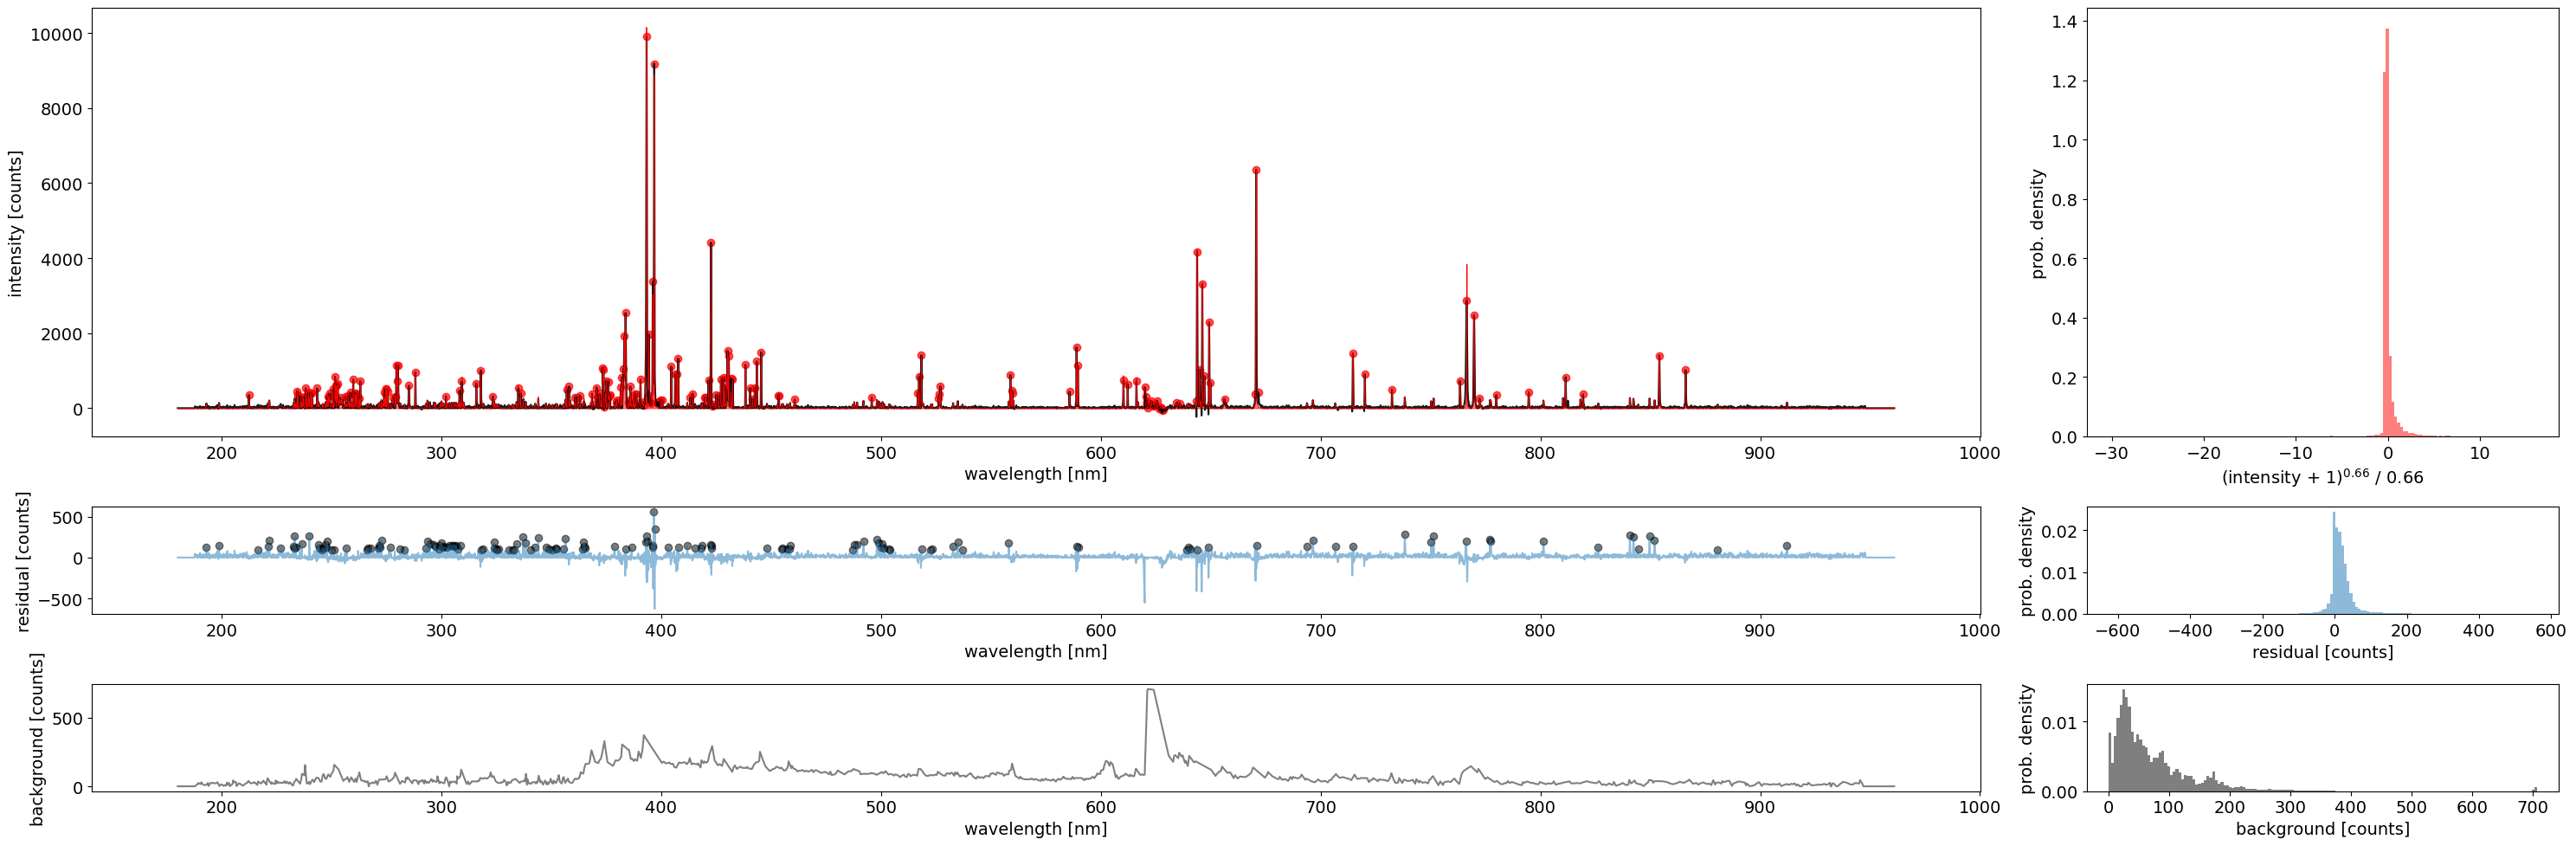

{'peak_dictionary': {np.int64(6367): array([1.14030220e+01, 3.92249113e+02, 4.77028237e-02, 0.00000000e+00]),
  np.int64(6376): array([  0.        , 392.59966646,  16.08823501,  42.40796689]),
  np.int64(6387): array([6.55807323e+02, 3.92966667e+02, 9.85258913e-02, 1.70688514e-01]),
  np.int64(6400): array([1.79299598e+03, 3.93335700e+02, 9.43215171e-02, 0.00000000e+00]),
  np.int64(6421): array([6.89155768e+02, 3.93966667e+02, 6.77321070e-01, 0.00000000e+00]),
  np.int64(6430): array([3.19176353e+02, 3.94350570e+02, 7.66136643e-02, 0.00000000e+00]),
  np.int64(6443): array([0.00000000e+00, 3.94721432e+02, 0.00000000e+00, 7.90050451e-02]),
  np.int64(6458): array([  0.        , 395.20008046,   0.        ,   0.        ]),
  np.int64(6468): array([1.15592423e+02, 3.95665523e+02, 1.36880211e-01, 0.00000000e+00]),
  np.int64(6484): array([3.50693344e+02, 3.96122570e+02, 6.21754494e-02, 0.00000000e+00]),
  np.int64(6492): array([  0.        , 396.4       ,   4.60971389, 215.84626671]),
  np

In [6]:
finder.fit_spectrum(testwavelength, testdata, n_sigma=1, plot=True)

In [10]:
finder.fit_spectrum_data(25)

fourier peaks done
fit peaks done
fit shoulders done
x window length: 23
x window length: 16
x window length: 14
x window length: 21
x window length: 22
x window length: 31
x window length: 27
x window length: 29
x window length: 16
x window length: 12
x window length: 43
x window length: 21
x window length: 25
x window length: 38
x window length: 23
x window length: 27
x window length: 43
x window length: 14
x window length: 29
x window length: 26
x window length: 19
x window length: 23
x window length: 7
x window length: 58
x window length: 53
x window length: 32
x window length: 18
x window length: 36
x window length: 24
x window length: 14
x window length: 26
x window length: 41
x window length: 42
x window length: 47
x window length: 30
x window length: 28
x window length: 23
x window length: 25
x window length: 10
x window length: 21
x window length: 10
x window length: 10
x window length: 20
x window length: 13
x window length: 25
x window length: 10
x window length: 24
x window

{'peak_dictionary': {np.int64(6334): array([1.31153215e+01, 3.91133334e+02, 3.76997361e-01, 0.00000000e+00]),
  np.int64(6346): array([  0.        , 391.53333432,   5.72770572,   0.        ]),
  np.int64(6355): array([5.95248425e+01, 3.91833329e+02, 1.63358564e-01, 0.00000000e+00]),
  np.int64(6367): array([0.00000000e+00, 3.92233333e+02, 1.69093081e-02, 0.00000000e+00]),
  np.int64(6375): array([8.96856909e+02, 3.92566667e+02, 2.58533616e-01, 3.28344401e-02]),
  np.int64(6400): array([7.61426991e+03, 3.93291934e+02, 1.29145285e-01, 1.15938935e-01]),
  np.int64(6421): array([1.05017841e+02, 3.93966667e+02, 1.73863455e-01, 0.00000000e+00]),
  np.int64(6430): array([3.88694529e+02, 3.94345524e+02, 8.59591140e-02, 0.00000000e+00]),
  np.int64(6447): array([  0.        , 394.83333333,  75.8353327 ,   0.        ]),
  np.int64(6459): array([  0.        , 395.29999714,  77.41159669,  15.48880517]),
  np.int64(6471): array([  0.        , 395.7       ,  81.0791024 ,  13.48430429]),
  np.int64(6